# Verify the interaction of equality and inequality constraints

In [2]:
%matplotlib widget

In [3]:
import os, importlib, inspect
from IPython.display import display, Math, Latex, Markdown
from bmcs_matmod.gsm.gsm_models.gsm_base import GSMBase, sp
import numpy as np
import matplotlib.pyplot as plt

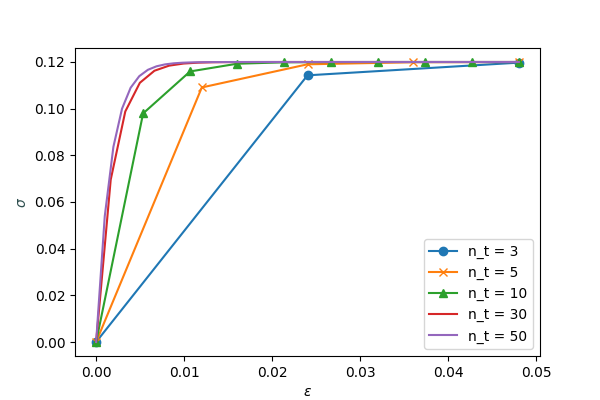

In [9]:
fig, ax_sig = plt.subplots(1, 1, figsize=(6, 4))

from bmcs_matmod.gsm.gsm_models.gsm1d_vevp import GSM1D_VEVP
gsm_vevp = GSM1D_VEVP()
mparams = dict(E = 100, K = 10, f_c = 1, eta_vp = 1, eta_ve = 1)

n_t = 3
for n_t, ls in zip((3, 5, 10, 30, 50), ('o-', 'x-', '^-', '-', '-')):
    rate = .4
    n_I = 1 
    eps_max = 0.3 * rate
    t_t = np.linspace(0, 1*rate, n_t)
    eps_n_t = np.linspace(0, eps_max*rate, n_t)
    response = gsm_vevp.get_response(eps_n_t, t_t, **mparams)
    t_t, eps_ta, sig_ta, Eps_t, Sig_t, iter_t, lam_t, (d_t_t, d_eps_ta) = response
    eps_t = eps_ta[:, 0]
    sig_t = sig_ta[:, 0, 0]
    eps_ve_t, eps_vp_t, z_t = Eps_t[:, 0, :].T
    sig_ve_t, sig_vp_t, Z_t = Sig_t[:, 0, :].T
    ax_sig.plot(eps_t, sig_t, ls, label=rf'n_t = {n_t}')
ax_sig.set_ylabel(r'$\sigma$', color='darkslategray')
ax_sig.set_xlabel(r'$\varepsilon$')
ax_sig.legend()

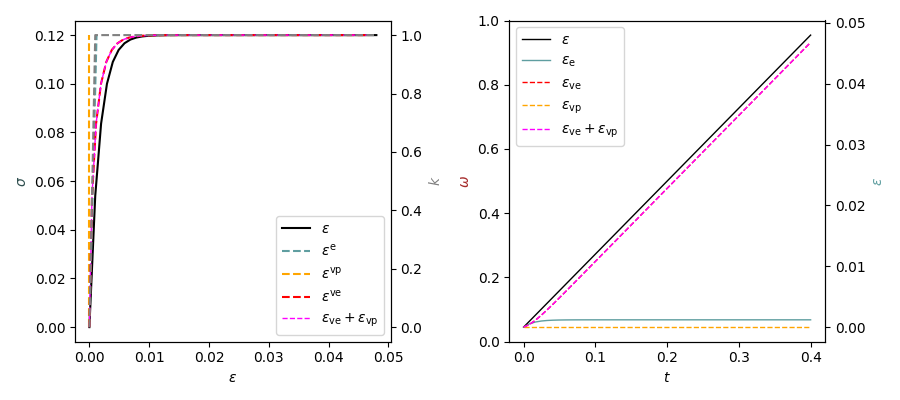

In [8]:
fig, (ax_sig, ax_omega) = plt.subplots(1, 2, figsize=(9, 4))

# Plot stress-strain and iterations-strain curves
ax_iter = ax_sig.twinx()
ax_eps = ax_omega.twinx()

ax_sig.plot(eps_t, sig_t, color='black', label=r'$\varepsilon$')
ax_sig.plot(eps_t - eps_ve_t - eps_vp_t, sig_t, ls='dashed', color='cadetblue', label=r'$\varepsilon^\mathrm{e}$')
ax_sig.plot(eps_vp_t, sig_t, ls='dashed', color='orange', label=r'$\varepsilon^\mathrm{vp}$')
ax_sig.plot(eps_ve_t, sig_t, ls='dashed', color='red', label=r'$\varepsilon^\mathrm{ve}$')
ax_sig.plot(eps_ve_t + eps_vp_t, sig_t, label=r'$\varepsilon_\mathrm{ve} + \varepsilon_\mathrm{vp}$', color='magenta', ls='dashed', lw=1)

ax_sig.set_ylabel(r'$\sigma$', color='darkslategray')
ax_sig.set_xlabel(r'$\varepsilon$')
ax_sig.legend()

ax_iter.plot(eps_t, iter_t, ls='dashed', color='gray')
ax_iter.set_ylabel(r'$k$', color='gray')

# ax_omega.plot(t_t, omega_t, label='Damage', color='brown')
ax_eps.plot(t_t, eps_t, label=r'$\varepsilon$', color='black', lw=1)
ax_eps.plot(t_t, eps_t - eps_ve_t - eps_vp_t, label=r'$\varepsilon_\mathrm{e}$', color='cadetblue', lw=1)
ax_eps.plot(t_t, eps_ve_t, label=r'$\varepsilon_\mathrm{ve}$', color='red', ls='dashed', lw=1)
ax_eps.plot(t_t, eps_vp_t, label=r'$\varepsilon_\mathrm{vp}$', color='orange', ls='dashed', lw=1)
ax_eps.plot(t_t, eps_ve_t + eps_vp_t, label=r'$\varepsilon_\mathrm{ve} + \varepsilon_\mathrm{vp}$', color='magenta', ls='dashed', lw=1)
#ax_eps.legend()
ax_omega.set_xlabel(r'$t$')
ax_omega.set_ylabel(r'$\omega$', color='brown')
ax_eps.set_ylabel(r'$\varepsilon$', color='cadetblue')
ax_eps.legend()

plt.tight_layout()
plt.show()